In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
## hello

In [2]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').iloc[:, 0]
X_train_30 = pd.read_csv('X_train_30.csv')
y_train_30 = pd.read_csv('y_train_30.csv').iloc[:, 0]

X_train_60 = pd.read_csv('X_train_60.csv')
y_train_60 = pd.read_csv('y_train_60.csv').iloc[:, 0]

X_train_100 = pd.read_csv('X_train_100.csv')
y_train_100 = pd.read_csv('y_train_100.csv').iloc[:, 0]

### Find best K for 30%

In [3]:
k_values = [3, 5, 7, 11, 15, 21, 31, 51, 101, 201, 301]

In [4]:
cv_scores_30 = []

In [5]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_30, y_train_30, cv=5)
    cv_scores_30.append(scores.mean())
    print(f"k={k}: CV accuracy = {scores.mean():.4f}")

k=3: CV accuracy = 0.9960
k=5: CV accuracy = 0.9950
k=7: CV accuracy = 0.9937
k=11: CV accuracy = 0.9919
k=15: CV accuracy = 0.9902
k=21: CV accuracy = 0.9877
k=31: CV accuracy = 0.9851
k=51: CV accuracy = 0.9800
k=101: CV accuracy = 0.9737
k=201: CV accuracy = 0.9649
k=301: CV accuracy = 0.9612


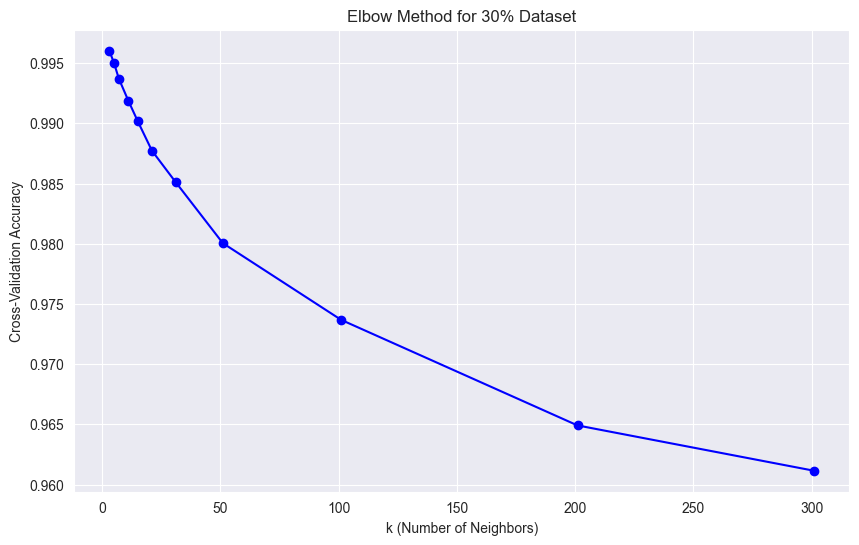

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_30, 'bo-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Method for 30% Dataset')
plt.grid(True)
plt.show()

### Find Best K for 60%

In [7]:
cv_scores_60 = []

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_60, y_train_60, cv=5)
    cv_scores_60.append(scores.mean())
    print(f"k={k}: CV accuracy = {scores.mean():.4f}")

k=3: CV accuracy = 0.9977
k=5: CV accuracy = 0.9971
k=7: CV accuracy = 0.9964
k=11: CV accuracy = 0.9952
k=15: CV accuracy = 0.9940
k=21: CV accuracy = 0.9925
k=31: CV accuracy = 0.9904
k=51: CV accuracy = 0.9870
k=101: CV accuracy = 0.9800
k=201: CV accuracy = 0.9736
k=301: CV accuracy = 0.9683


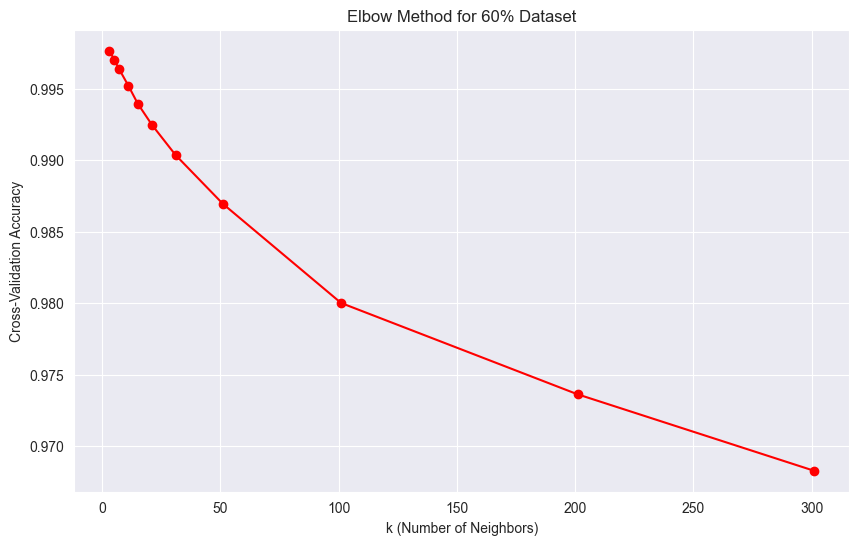

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_60, 'ro-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Elbow Method for 60% Dataset')
plt.grid(True)
plt.show()

### Find Best K for 100%

In [10]:
cv_scores_100 = []

In [11]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_100, y_train_100, cv=5)
    cv_scores_100.append(scores.mean())
    print(f"k={k}: CV accuracy = {scores.mean():.4f}")

k=3: CV accuracy = 0.9984
k=5: CV accuracy = 0.9978
k=7: CV accuracy = 0.9973
k=11: CV accuracy = 0.9965
k=15: CV accuracy = 0.9958
k=21: CV accuracy = 0.9947
k=31: CV accuracy = 0.9932
k=51: CV accuracy = 0.9906
k=101: CV accuracy = 0.9856
k=201: CV accuracy = 0.9785
k=301: CV accuracy = 0.9746


### Train on 30%

In [12]:
start_time = time.time()

In [13]:
knn_30 = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn_30.fit(X_train_30, y_train_30)

KNeighborsClassifier(n_neighbors=3)

In [15]:
training_time = time.time() - start_time

In [16]:
y_pred_30_train = knn_30.predict(X_train_30)

In [17]:
y_pred_30_test = knn_30.predict(X_test)

In [18]:
train_acc = accuracy_score(y_train_30, y_pred_30_train)
train_precision = precision_score(y_train_30, y_pred_30_train, average='weighted')
train_recall = recall_score(y_train_30, y_pred_30_train, average='weighted')
train_f1 = f1_score(y_train_30, y_pred_30_train, average='weighted')

In [19]:
test_acc = accuracy_score(y_test, y_pred_30_test)
test_precision = precision_score(y_test, y_pred_30_test, average='weighted')
test_recall = recall_score(y_test, y_pred_30_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_30_test, average='weighted')

In [20]:
print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Set Size: {X_train_30.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")
print("\n--- TRAINING SET METRICS ---")
print(f"Accuracy:  {train_acc:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")

print("\n--- TEST SET METRICS ---")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

Training Time: 0.2995 seconds
Training Set Size: 70710 samples
Test Set Size: 37792 samples

--- TRAINING SET METRICS ---
Accuracy:  0.9982
Precision: 0.9982
Recall:    0.9982
F1-Score:  0.9982

--- TEST SET METRICS ---
Accuracy:  0.9927
Precision: 0.9954
Recall:    0.9927
F1-Score:  0.9937


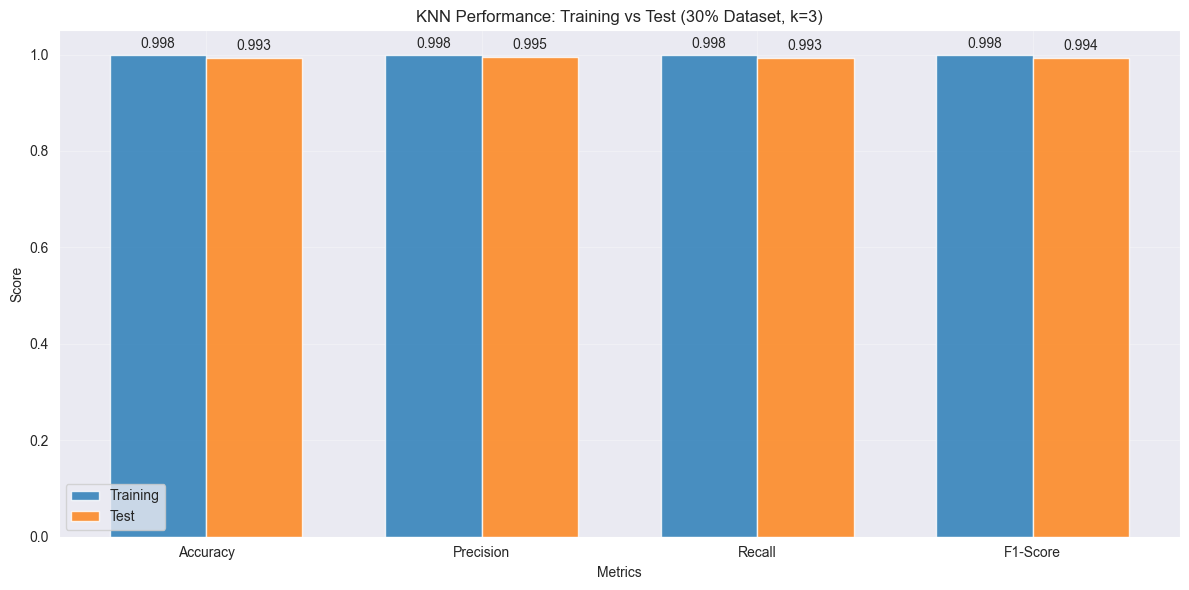


--- DETAILED CLASSIFICATION REPORT (TEST SET) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      0.99      0.99      3497
           2       0.73      0.97      0.83       298
           3       0.15      1.00      0.26        16
           4       1.00      0.99      0.99     20203

    accuracy                           0.99     37792
   macro avg       0.77      0.99      0.82     37792
weighted avg       1.00      0.99      0.99     37792



In [21]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_acc, train_precision, train_recall, train_f1]
test_scores = [test_acc, test_precision, test_recall, test_f1]

x_pos = range(len(metrics))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([p - width/2 for p in x_pos], train_scores, width, label='Training', alpha=0.8)
plt.bar([p + width/2 for p in x_pos], test_scores, width, label='Test', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('KNN Performance: Training vs Test (30% Dataset, k=3)')
plt.xticks(x_pos, metrics)
plt.legend()
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(train_scores, test_scores)):
    plt.text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n--- DETAILED CLASSIFICATION REPORT (TEST SET) ---")
print(classification_report(y_test, y_pred_30_test))

### Train on 60%

In [22]:
start_time = time.time()

In [23]:
knn_60 = KNeighborsClassifier(n_neighbors=3)
knn_60.fit(X_train_60, y_train_60)

KNeighborsClassifier(n_neighbors=3)

In [24]:
training_time = time.time() - start_time

In [25]:
y_pred_60_train = knn_60.predict(X_train_60)

In [26]:
y_pred_60_test = knn_60.predict(X_test)

In [27]:
train_acc = accuracy_score(y_train_60, y_pred_60_train)
train_precision = precision_score(y_train_60, y_pred_60_train, average='weighted')
train_recall = recall_score(y_train_60, y_pred_60_train, average='weighted')
train_f1 = f1_score(y_train_60, y_pred_60_train, average='weighted')

In [28]:
test_acc = accuracy_score(y_test, y_pred_60_test)
test_precision = precision_score(y_test, y_pred_60_test, average='weighted')
test_recall = recall_score(y_test, y_pred_60_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_60_test, average='weighted')

In [29]:
print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Set Size: {X_train_60.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")
print("\n--- TRAINING SET METRICS ---")
print(f"Accuracy:  {train_acc:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")

print("\n--- TEST SET METRICS ---")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

Training Time: 0.1738 seconds
Training Set Size: 141420 samples
Test Set Size: 37792 samples

--- TRAINING SET METRICS ---
Accuracy:  0.9989
Precision: 0.9989
Recall:    0.9989
F1-Score:  0.9989

--- TEST SET METRICS ---
Accuracy:  0.9949
Precision: 0.9964
Recall:    0.9949
F1-Score:  0.9955


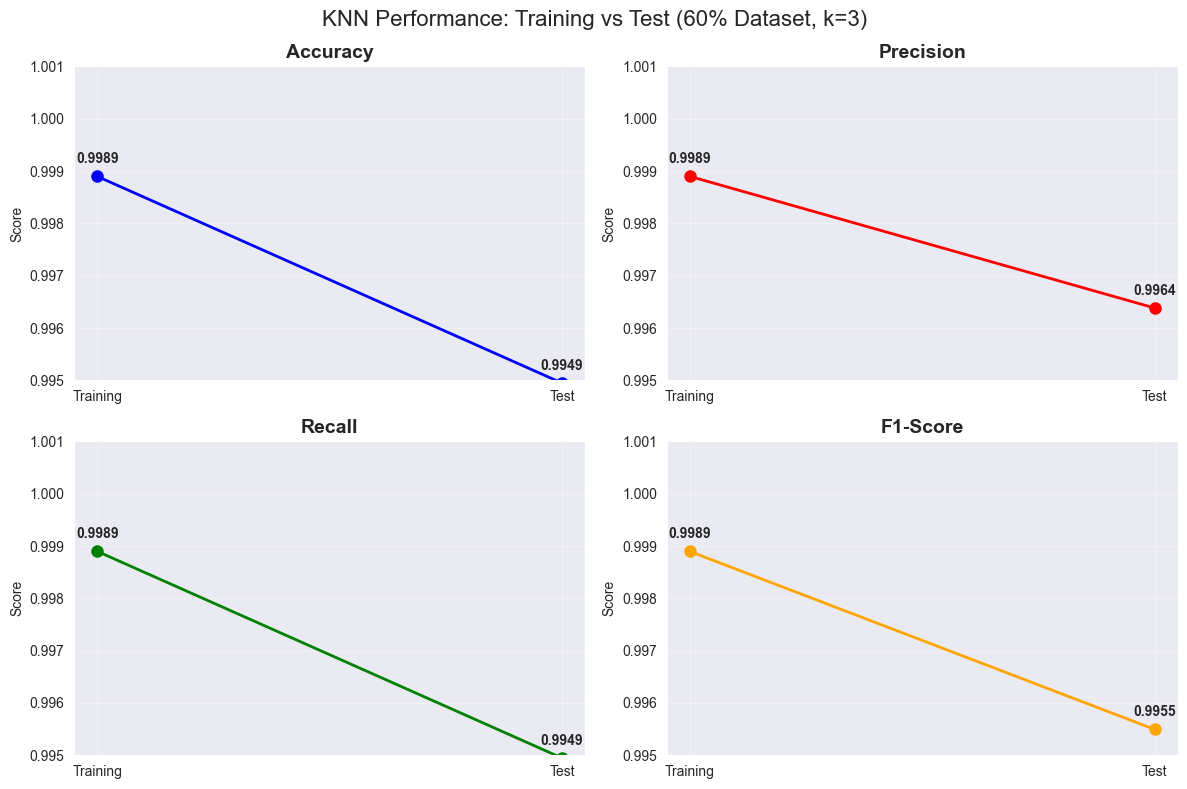


--- DETAILED CLASSIFICATION REPORT (TEST SET) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      1.00      0.99      3497
           2       0.81      0.97      0.88       298
           3       0.23      1.00      0.37        16
           4       1.00      0.99      1.00     20203

    accuracy                           0.99     37792
   macro avg       0.80      0.99      0.85     37792
weighted avg       1.00      0.99      1.00     37792



In [30]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_acc, train_precision, train_recall, train_f1]
test_scores = [test_acc, test_precision, test_recall, test_f1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('KNN Performance: Training vs Test (60% Dataset, k=3)', fontsize=16)

axes = axes.flatten()
colors = ['blue', 'red', 'green', 'orange']

for i, (metric, train_val, test_val, color) in enumerate(zip(metrics, train_scores, test_scores, colors)):
    ax = axes[i]

    ax.plot(['Training', 'Test'], [train_val, test_val],
            marker='o', linewidth=2, markersize=8, color=color)

    ax.text(0, train_val + 0.0002, f'{train_val:.4f}', ha='center', va='bottom', fontweight='bold')
    ax.text(1, test_val + 0.0002, f'{test_val:.4f}', ha='center', va='bottom', fontweight='bold')

    ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylim(0.995, 1.001)
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n--- DETAILED CLASSIFICATION REPORT (TEST SET) ---")
print(classification_report(y_test, y_pred_60_test))

### Train on 100%

In [31]:
start_time = time.time()

In [32]:
knn_100 = KNeighborsClassifier(n_neighbors=3)
knn_100.fit(X_train_100, y_train_100)

KNeighborsClassifier(n_neighbors=3)

In [33]:
training_time = time.time() - start_time

In [34]:
y_pred_100_train = knn_100.predict(X_train_100)

In [35]:
y_pred_100_test = knn_100.predict(X_test)

In [36]:
train_acc = accuracy_score(y_train_100, y_pred_100_train)
train_precision = precision_score(y_train_100, y_pred_100_train, average='weighted')
train_recall = recall_score(y_train_100, y_pred_100_train, average='weighted')
train_f1 = f1_score(y_train_100, y_pred_100_train, average='weighted')

In [37]:
test_acc = accuracy_score(y_test, y_pred_100_test)
test_precision = precision_score(y_test, y_pred_100_test, average='weighted')
test_recall = recall_score(y_test, y_pred_100_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_100_test, average='weighted')

In [38]:
print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Set Size: {X_train_100.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")
print("\n--- TRAINING SET METRICS ---")
print(f"Accuracy:  {train_acc:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")

print("\n--- TEST SET METRICS ---")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

Training Time: 0.3530 seconds
Training Set Size: 235700 samples
Test Set Size: 37792 samples

--- TRAINING SET METRICS ---
Accuracy:  0.9993
Precision: 0.9993
Recall:    0.9993
F1-Score:  0.9993

--- TEST SET METRICS ---
Accuracy:  0.9962
Precision: 0.9970
Recall:    0.9962
F1-Score:  0.9965


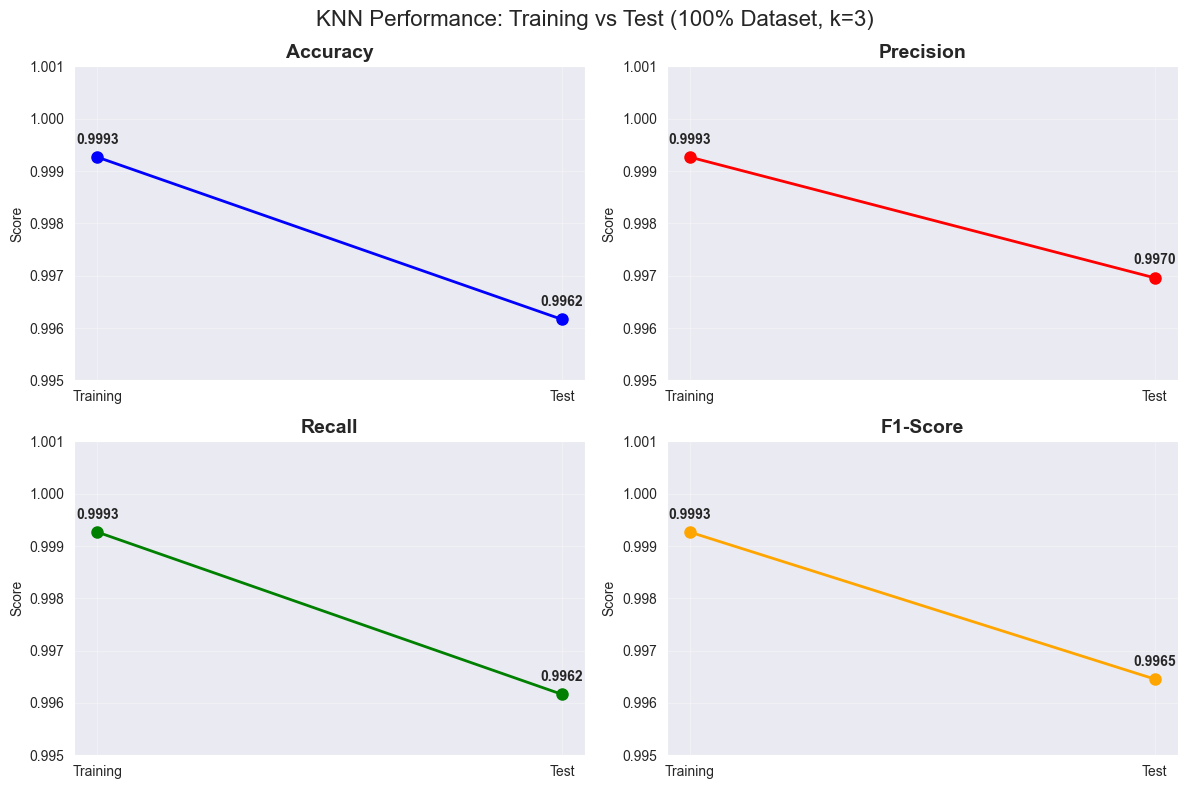


--- DETAILED CLASSIFICATION REPORT (TEST SET) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13778
           1       0.99      1.00      0.99      3497
           2       0.84      0.96      0.89       298
           3       0.31      0.94      0.46        16
           4       1.00      0.99      1.00     20203

    accuracy                           1.00     37792
   macro avg       0.83      0.98      0.87     37792
weighted avg       1.00      1.00      1.00     37792



In [39]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_acc, train_precision, train_recall, train_f1]
test_scores = [test_acc, test_precision, test_recall, test_f1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('KNN Performance: Training vs Test (100% Dataset, k=3)', fontsize=16)

axes = axes.flatten()
colors = ['blue', 'red', 'green', 'orange']

for i, (metric, train_val, test_val, color) in enumerate(zip(metrics, train_scores, test_scores, colors)):
    ax = axes[i]

    ax.plot(['Training', 'Test'], [train_val, test_val],
            marker='o', linewidth=2, markersize=8, color=color)

    ax.text(0, train_val + 0.0002, f'{train_val:.4f}', ha='center', va='bottom', fontweight='bold')
    ax.text(1, test_val + 0.0002, f'{test_val:.4f}', ha='center', va='bottom', fontweight='bold')

    ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylim(0.995, 1.001)
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n--- DETAILED CLASSIFICATION REPORT (TEST SET) ---")
print(classification_report(y_test, y_pred_100_test))

### Comparison

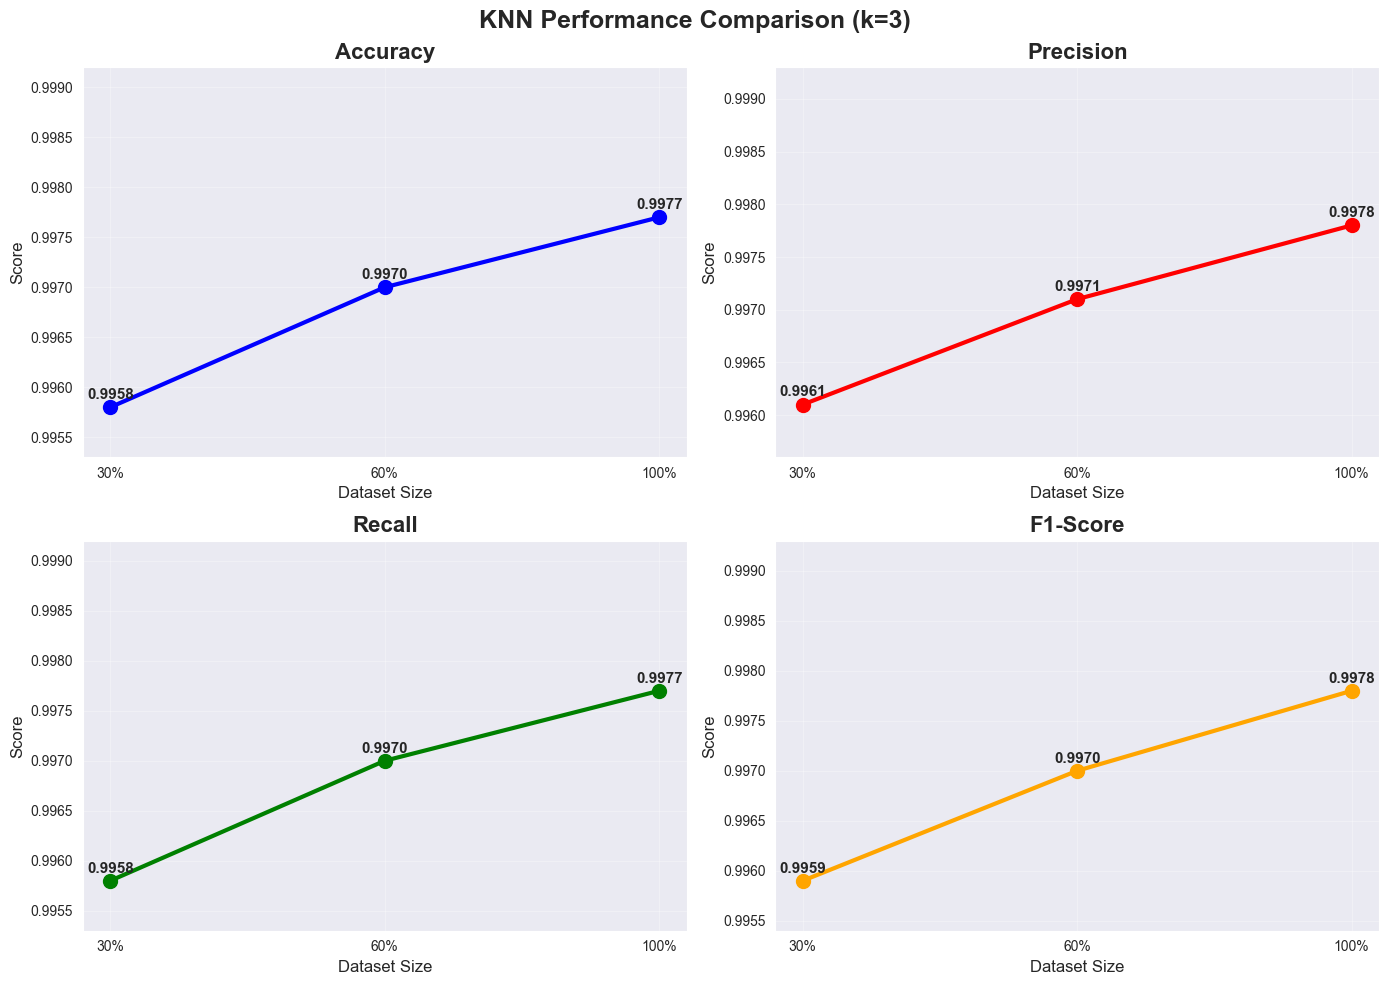

In [40]:
dataset_sizes = ['30%', '60%', '100%']
accuracy = [0.9958, 0.9970, 0.9977]
precision = [0.9961, 0.9971, 0.9978]
recall = [0.9958, 0.9970, 0.9977]
f1_score = [0.9959, 0.9970, 0.9978]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('KNN Performance Comparison (k=3)', fontsize=18, fontweight='bold')
axes = axes.flatten()
metrics = [accuracy, precision, recall, f1_score]
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['blue', 'red', 'green', 'orange']
for i, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    ax = axes[i]


    ax.plot(dataset_sizes, metric, marker='o', linewidth=3, markersize=10, color=color)


    for j, val in enumerate(metric):
        ax.text(j, val + 0.00005, f'{val:.4f}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xlabel('Dataset Size', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(min(metric) - 0.0005, max(metric) + 0.0015)

plt.tight_layout()
plt.show()